In [17]:
# pip install sklearn

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

sns.set()

In [2]:
plt.rcParams['font.family'] = [font.name for font in font_manager.FontManager().ttflist if 'jp' in str(font).lower()]

In [3]:
nesagenashi = pickle.load(open('data/nesagenashi2.pkl', 'rb'))
nesage_Sold = pickle.load(open('data/nesage_Sold2.pkl', 'rb'))
nesage_NotSold = pickle.load(open('data/nesage_NotSold2.pkl', 'rb'))

In [4]:
nesagenashi = nesagenashi.rename(
    columns=
    {
        'Nodiscount_period': 'keisaiday'
        ,'Nodiscount_price': 'price'
    })
nesage_Sold = nesage_Sold.rename(
    columns=
    {
        'period': 'keisaiday'
        ,'sold_price':'price'
    })
nesage_NotSold  = nesage_NotSold.rename(
    columns=
    {
        'period': 'keisaiday'
        , 'not_sold_price':'price' 
    })

In [5]:
print(nesage_Sold.shape)
nesage_Sold = nesage_Sold[nesage_Sold.groupby('n_car_cd')['n_car_cd'].transform('count')>= 2]
print(nesage_Sold.shape)

(182747, 17)
(182541, 17)


In [6]:
print(nesage_NotSold.shape)
nesage_NotSold = nesage_NotSold[nesage_NotSold.groupby('n_car_cd')['n_car_cd'].transform('count')>= 2]
print(nesage_NotSold.shape)

(182747, 17)
(182541, 17)


In [7]:
print(nesagenashi.shape)
nesagenashi = nesagenashi[nesagenashi.groupby('n_car_cd')['n_car_cd'].transform('count')>= 2]
print(nesagenashi.shape)

(396128, 17)
(395907, 17)


In [8]:
nesagenashi_train, nesagenashi_test = train_test_split(nesagenashi, test_size=0.2, random_state=0, stratify=nesagenashi.n_car_cd)
nesage_Sold_train, nesage_Sold_test = train_test_split(nesage_Sold,  test_size=0.2, random_state=0, stratify=nesage_Sold.n_car_cd)
nesage_NotSold_train, nesage_NotSold_test = train_test_split(nesage_NotSold,  test_size=0.2, random_state=0, stratify=nesage_NotSold.n_car_cd)

In [9]:
nesagenashi_train.shape, nesagenashi_test.shape

((316725, 17), (79182, 17))

In [10]:
train = pd.concat([nesagenashi_train
                   , nesage_Sold_train
                   , nesage_NotSold_train])
test = pd.concat([nesagenashi_test
                 , nesage_Sold_test
                 , nesage_NotSold_test])

In [11]:
test

,n_car_cd,price,n_p_katashiki_id,n_p_grade_id,nenshiki,e_distance,zan_syaken,seibi,zan_syaken+α(seibi),repair_flag,exhaust_nm_cc,client_dealer_flag,pre_n,color_cd2,sunroof,leather_seats,keisaiday
375541,10507114,890000,5,2,1,350,510.0,2,0.0,1,660,0,沖縄県,40,0,0,12
150346,10102058,1540000,23,19,3,41927,658.0,1,0.0,1,1500,1,埼玉県,10,0,0,16
55574,10551015,325000,13,20,8,32525,559.0,0,0.0,1,660,0,岐阜県,40,0,0,5
51561,10402027,3578000,19,26,0,10,1040.0,2,0.0,1,2200,0,愛知県,60,0,0,30
136149,10202010,95000,39,130,16,115207,0.0,0,0.0,2,2000,0,埼玉県,20,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60527,10102017,4289000,113,83,2,18000,488.0,0,0.0,1,2800,0,大阪府,30,1,0,9
21657,10101059,792000,23,83,7,13951,480.0,1,0.0,1,1500,1,愛知県,30,0,0,22
62902,10252027,1649000,19,33,1,10000,430.0,0,0.0,1,2000,0,茨城県,35,0,0,32
61387,20252502,1398000,54,32,8,107000,289.0,0,0.0,1,2000,0,埼玉県,30,0,1,29


In [44]:
train = pd.concat([nesagenashi_train
                   , nesage_Sold_train
                  ])
test = pd.concat([nesagenashi_test
                 , nesage_Sold_test])

In [45]:
test

,n_car_cd,price,n_p_katashiki_id,n_p_grade_id,nenshiki,e_distance,zan_syaken,seibi,zan_syaken+α(seibi),repair_flag,exhaust_nm_cc,client_dealer_flag,pre_n,color_cd2,sunroof,leather_seats,keisaiday
375541,10507114,890000,5,2,1,350,510.0,2,0.0,1,660,0,沖縄県,40,0,0,12
150346,10102058,1540000,23,19,3,41927,658.0,1,0.0,1,1500,1,埼玉県,10,0,0,16
55574,10551015,325000,13,20,8,32525,559.0,0,0.0,1,660,0,岐阜県,40,0,0,5
51561,10402027,3578000,19,26,0,10,1040.0,2,0.0,1,2200,0,愛知県,60,0,0,30
136149,10202010,95000,39,130,16,115207,0.0,0,0.0,2,2000,0,埼玉県,20,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60527,10102017,4274000,113,83,2,18000,479.0,0,0.0,1,2800,0,大阪府,30,1,0,2
21657,10101059,748000,23,83,7,13951,458.0,1,0.0,1,1500,1,愛知県,30,0,0,2
62902,10252027,1398000,19,33,1,10000,398.0,0,0.0,1,2000,0,茨城県,35,0,0,18
61387,20252502,1298000,54,32,8,107000,260.0,0,0.0,1,2000,0,埼玉県,30,0,1,11


# 学習データの中身

車種数 1343


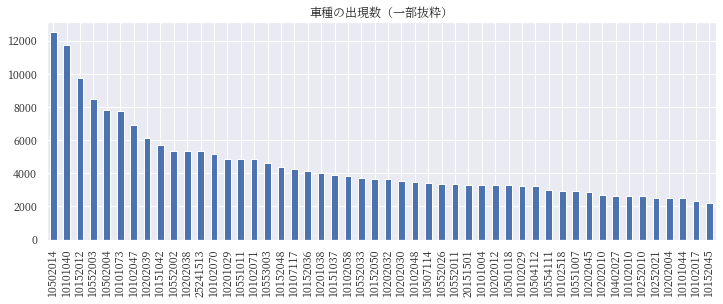

In [46]:
print('車種数',  train.n_car_cd.nunique())
train.n_car_cd.value_counts().head(50).plot.bar(figsize=(12, 4))
plt.title('車種の出現数（一部抜粋）')
plt.show()

In [47]:
train.n_car_cd.value_counts().median()

32.0

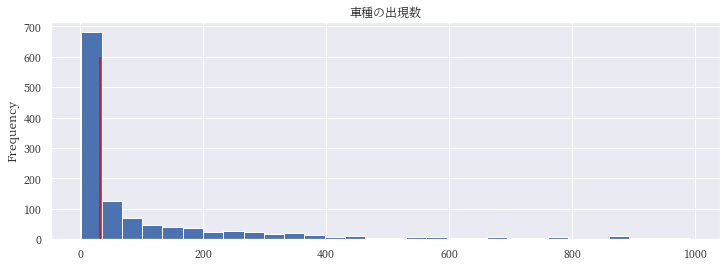

In [48]:
n_car_cd = train.n_car_cd.value_counts().to_frame()
n_car_cd[n_car_cd.n_car_cd <= 1000].n_car_cd.plot.hist(bins=30, figsize=(12, 4))
plt.title('車種の出現数')
plt.vlines(train.n_car_cd.value_counts().median(), ymin=0, ymax=600,color='red')
plt.show()

In [49]:
train.n_car_cd.value_counts().quantile([0.25, 0.75])

0.25      6
0.75    212
Name: n_car_cd, dtype: Int64

In [50]:
train['n_car_cd + n_p_katashiki_id + nenshiki'] = \
train['n_car_cd'].astype(str)+ '+' + train['n_p_katashiki_id'].astype(str) + '+' + train['n_p_grade_id'].astype(str)

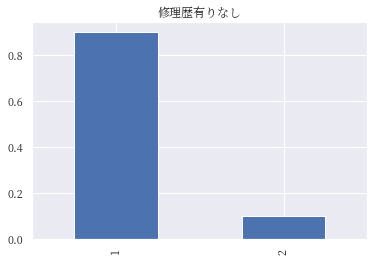

In [51]:

train.repair_flag.value_counts(normalize=True).plot.bar()
plt.title('修理歴有りなし')
plt.show()

In [52]:
train.repair_flag.value_counts()

1    415626
2     47131
Name: repair_flag, dtype: Int64

In [53]:
train.repair_flag.value_counts(normalize=True)

1    0.898152
2    0.101848
Name: repair_flag, dtype: Float64

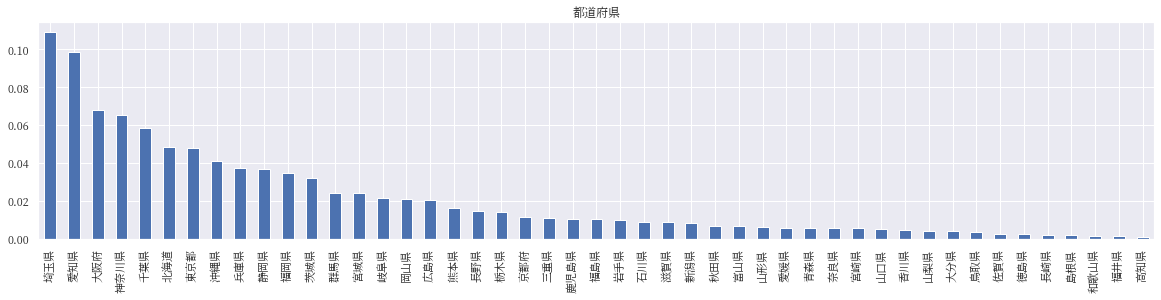

In [54]:
train.pre_n.value_counts(normalize=True).plot.bar(figsize=(20, 4))
plt.title('都道府県')
plt.show()

In [55]:
train.pre_n.value_counts(normalize=True)

埼玉県     0.109087
愛知県     0.098782
大阪府     0.068051
神奈川県    0.065373
千葉県     0.058452
北海道     0.048667
東京都     0.048053
沖縄県     0.041052
兵庫県     0.037555
静岡県     0.036974
福岡県     0.034794
茨城県     0.032313
群馬県     0.024603
宮城県     0.024494
岐阜県     0.021752
岡山県     0.021097
広島県     0.020920
熊本県     0.016413
長野県     0.014677
栃木県     0.014139
京都府     0.011775
三重県     0.011014
鹿児島県    0.010768
福島県     0.010649
岩手県     0.009945
石川県     0.008977
滋賀県     0.008964
新潟県     0.008795
秋田県     0.007190
富山県     0.007066
山形県     0.006252
愛媛県     0.006170
青森県     0.006068
奈良県     0.005776
宮崎県     0.005735
山口県     0.005331
香川県     0.004787
山梨県     0.004387
大分県     0.004255
鳥取県     0.003898
佐賀県     0.003030
徳島県     0.002900
長崎県     0.002397
島根県     0.002232
和歌山県    0.001647
福井県     0.001539
高知県     0.001206
Name: pre_n, dtype: float64

# 削除処理の追加

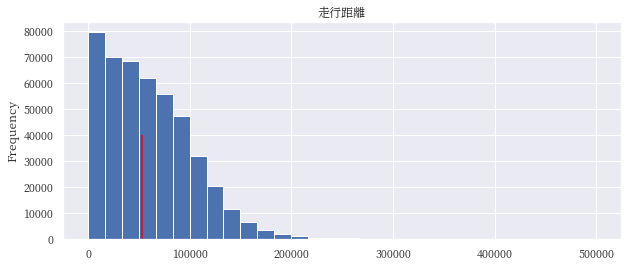

In [56]:
train[train.e_distance <0.5e6].e_distance.plot.hist(bins=30, figsize=(10, 4))
plt.title('走行距離')
plt.vlines(train[train.e_distance <0.5e6].e_distance.median(), ymin=0, ymax=40000, color='red')
plt.show()

In [57]:
train[train.e_distance <0.5e6].e_distance.median()

53115.0

In [58]:
train[train.e_distance <0.5e6].e_distance.quantile([0.25, 0.75])

0.25    25254.5
0.75    86900.0
Name: e_distance, dtype: float64

# 排気量の削除処理

In [59]:
print(train.shape)
train = train[(train.exhaust_nm_cc != '****') & (train.exhaust_nm_cc != 'FC') & (train.exhaust_nm_cc != 'EV')]
print(train.shape)

(462757, 18)
(462305, 18)


In [60]:
print(test.shape)
test = test[(test.exhaust_nm_cc != '****') & (test.exhaust_nm_cc != 'FC') & (test.exhaust_nm_cc != 'EV')]
print(test.shape)

(115691, 17)
(115566, 17)


In [61]:
print(train.shape)
print(test.shape)
train = train[train.exhaust_nm_cc.astype(int) >= 0]
test = test[test.exhaust_nm_cc.astype(int) >= 0]

print(train.shape)
print(test.shape)

(462305, 18)
(115566, 17)
(462305, 18)
(115566, 17)


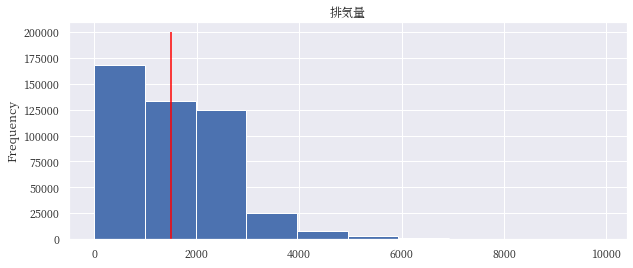

In [62]:
train.exhaust_nm_cc.astype(int).plot.hist(figsize=(10, 4))
plt.title('排気量')
plt.vlines(train.exhaust_nm_cc.astype(int).median(),ymin=0,ymax=200000,color='red')
plt.show()

In [63]:
train = train[exhaust_nm_cc.astype(int) >= 0]

NameError: name 'exhaust_nm_cc' is not defined

In [64]:
train.exhaust_nm_cc.astype(int).quantile([0.25, 0.5, 0.75])

0.25     660.0
0.50    1500.0
0.75    2000.0
Name: exhaust_nm_cc, dtype: float64

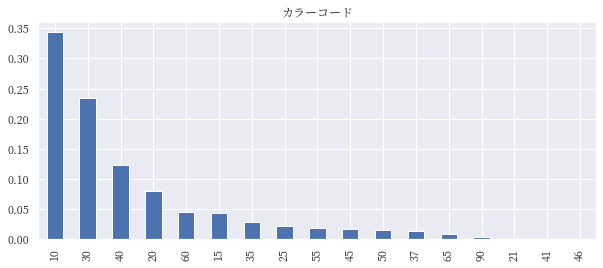

In [65]:
train.color_cd2.value_counts(normalize=True).plot.bar(figsize=(10, 4))
plt.title('カラーコード')
plt.show()

In [66]:
train.keisaiday.median()

22.0

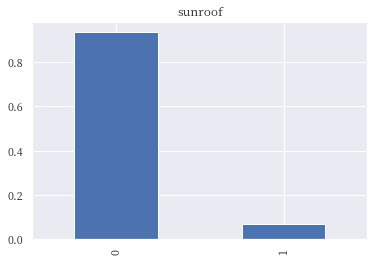

In [67]:
train.sunroof.value_counts(normalize=True).plot.bar()
plt.title('sunroof')
plt.show()

In [68]:
train.sunroof.value_counts(normalize=True)

0    0.932997
1    0.067003
Name: sunroof, dtype: Float64

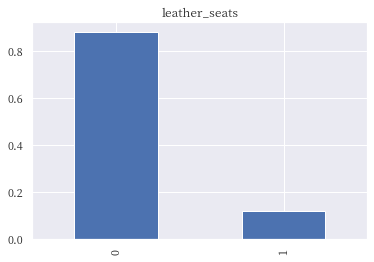

In [69]:
train.leather_seats.value_counts(normalize=True).plot.bar()
plt.title('leather_seats')
plt.show()

In [70]:
train.leather_seats.value_counts(normalize=True)

0    0.880265
1    0.119735
Name: leather_seats, dtype: Float64

In [71]:
train.keisaiday.mean()

43.361529726046655

In [72]:
train

,n_car_cd,price,n_p_katashiki_id,n_p_grade_id,nenshiki,e_distance,zan_syaken,seibi,zan_syaken+α(seibi),repair_flag,exhaust_nm_cc,client_dealer_flag,pre_n,color_cd2,sunroof,leather_seats,keisaiday,n_car_cd + n_p_katashiki_id + nenshiki
306053,10201013,898000,59,136,19,122000,631.0,2,0.0,2,2000,0,宮城県,10,0,0,168,10201013+59+136
242430,10102047,1650000,43,100,5,90608,0.0,1,0.0,1,1800,0,大阪府,10,0,0,14,10102047+43+100
270948,30151502,5480000,26,39,10,17000,625.0,2,0.0,1,4700,1,福岡県,40,1,0,53,30151502+26+39
192502,10101062,398000,23,50,7,22800,0.0,1,0.0,1,1000,0,千葉県,55,0,0,60,10101062+23+50
349838,10101004,398000,193,506,16,46450,0.0,1,1.0,1,3000,0,石川県,40,0,0,1,10101004+193+506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110273,10452006,618000,26,143,13,95000,522.0,0,0.0,2,2000,0,千葉県,30,0,0,14,10452006+26+143
5477,10101040,900000,23,27,6,49480,0.0,1,1.0,1,1800,1,愛知県,20,0,0,8,10101040+23+27
11272,10152029,450000,33,243,9,50331,0.0,1,1.0,1,1500,0,三重県,30,1,0,40,10152029+33+243
132340,10101062,170000,13,15,14,10433,547.0,1,0.0,1,1000,0,大阪府,40,0,0,25,10101062+13+15


In [73]:
# e_distance < 0.2e6
# exhaust_nm_cc < 0.6e4

#車種が２つ以上データに存在しているもの

In [74]:
print(train.shape)
train = train[(train.e_distance < 0.2e6) & (train.exhaust_nm_cc.astype(int) < 0.6e4) & (train.groupby('n_car_cd').n_car_cd.transform('count')>=2)]
print(train.shape)

(462305, 18)
(458347, 18)


In [75]:
print(test.shape)
test = test[(test.e_distance < 0.2e6) & (test.exhaust_nm_cc.astype(int) < 0.6e4) & (test.groupby('n_car_cd').n_car_cd.transform('count')>=2)]
print(test.shape)

(115566, 17)
(114482, 17)


In [76]:
pickle.dump(train, open('data/processed_train3.pkl', 'wb'))
pickle.dump(test, open('data/processed_test3.pkl', 'wb'))

In [346]:
train

,n_car_cd,price,n_p_katashiki_id,n_p_grade_id,nenshiki,e_distance,zan_syaken,seibi,zan_syaken+α(seibi),repair_flag,exhaust_nm_cc,client_dealer_flag,pre_n,color_cd2,sunroof,leather_seats,keisaiday,n_car_cd + n_p_katashiki_id + nenshiki
256414,10102062,3280000,16,63,3,25000,101.0,1,0.0,1,2500,1,福岡県,30,0,0,70,10102062+16+63
121638,10501018,349000,13,30,10,67000,612.0,0,0.0,1,660,0,群馬県,30,0,0,53,10501018+13+30
126902,20351502,999000,130,188,4,33000,193.0,0,0.0,1,1200,0,埼玉県,10,0,0,4,20351502+130+188
312777,10452019,1988000,13,29,3,72400,0.0,1,0.0,1,1600,0,岡山県,20,0,1,24,10452019+13+29
348698,10101040,590000,23,37,11,51100,128.0,1,0.0,1,1800,0,沖縄県,20,0,0,55,10101040+23+37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28260,10201029,398000,26,74,11,25514,712.0,1,0.0,1,1300,0,茨城県,50,0,0,18,10201029+26+74
17092,20351505,1199000,73,119,3,19000,0.0,1,1.0,1,1000,1,大阪府,10,0,0,42,20351505+73+119
41775,10457111,355985,8,20,11,91000,526.0,0,0.0,1,660,0,埼玉県,20,0,0,71,10457111+8+20
98289,20151502,4631190,173,436,1,10000,0.0,1,1.0,1,2000,1,兵庫県,30,1,1,84,20151502+173+436


In [347]:
train.shape

(526130, 18)

In [348]:
test.shape

(132502, 17)